In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [226]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [227]:
correlation = df.corr()

<AxesSubplot:>

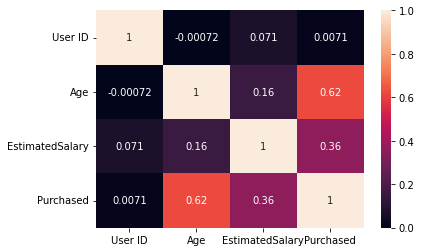

In [228]:
sns.heatmap(correlation, annot=True)

In [229]:
df.drop(columns=["User ID"], inplace=True)

In [230]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [231]:
model = LogisticRegression()
X = df.iloc[:,:-1]
Y = df["Purchased"]

In [232]:
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=20, test_size=0.20)

In [233]:
# model.fit(Xtrain, Ytrain)

In [234]:
dfhothead = pd.get_dummies(df,columns=["Gender"], prefix="Gender")

In [235]:
dfhothead

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [236]:
column = ['Age', "EstimatedSalary", "Gender_Male", "Gender_Female", "Purchased"]
dfhothead = dfhothead[column]
dfhothead.head(5)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
dfhothead['EstimatedSalary'] = scaler.fit_transform(dfhothead[["EstimatedSalary"]])
dfhothead.head()

,Age,EstimatedSalary,Gender_Male,Gender_Female,Purchased
0,19,0.029630,1,0,0
1,35,0.037037,1,0,0
2,26,0.207407,0,1,0
3,27,0.311111,0,1,0
4,19,0.451852,1,0,0


In [295]:
X = dfhothead.iloc[:,:-1]
Y = dfhothead["Purchased"]
# X
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [283]:
Xtrain, Xtest, Ytain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=20)

In [284]:
model.fit(Xtrain, Ytain)

LogisticRegression()

In [285]:
predict_y = model.predict(Xtest)

In [286]:
predict_y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [287]:
accuracy_score(Ytest, predict_y)

0.8

In [243]:
from sklearn.metrics import confusion_matrix

In [244]:
cm = confusion_matrix(Ytest, y_pred=predict_y)

In [245]:
cm

array([[75,  6],
       [ 9, 30]], dtype=int64)

<AxesSubplot:>

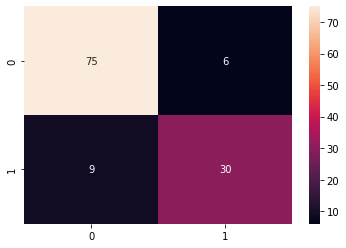

In [246]:
sns.heatmap(cm, annot=True)

In [247]:
Xtrain.shape

(280, 4)

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [249]:
dfhothead["EstimatedSalary"] = scaler.fit_transform(dfhothead[["EstimatedSalary"]])

In [250]:
cm

array([[75,  6],
       [ 9, 30]], dtype=int64)

In [251]:
tp = cm[0][0]
tn = cm[1][0]
fp = cm[0][1]
fn = cm[1][1]


In [252]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.7

In [288]:
precision_score(Ytest, predict_y)

0.9333333333333333

In [289]:
precision = tp/(tp+fp)

In [290]:
precision

0.9259259259259259

In [291]:
error = 1-accuracy

In [292]:
error


0.30000000000000004

In [293]:
recall = tp/(tp+fn)
recall

0.7142857142857143